In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from keras.models import Sequential
from keras.layers import Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout, Conv2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.callbacks import EarlyStopping
from keras.models import load_model

## Data Distribution & Augmentation

In [ ]:
training_dir = '../input/chest-xray-pneumonia/chest_xray/train'
testing_dir = '../input/chest-xray-pneumonia/chest_xray/test'
validation_dir = '../input/chest-xray-pneumonia/chest_xray/val'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g6YieqtvlLVP2mxZAu7EkKtzu5dbBk1iFB-qnMh1NmKzN3oR_cUNdw


In [ ]:
count = 0

for each_folder in sorted(os.listdir(training_dir)):
  
  count = 0
  
  for images in sorted(os.listdir(os.path.join(training_dir, each_folder))):
    count+=1
  
  print(each_folder, count) 

NORMAL 1341
PNEUMONIA 3875


In [ ]:
img = '../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/' + 'person1_bacteria_2.jpeg'

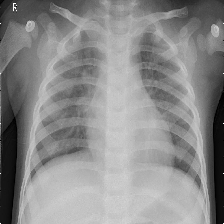

In [ ]:
load_img(img, target_size=(224, 224), grayscale=True)

In [ ]:
img_normal = '../input/chest-xray-pneumonia/chest_xray/train/NORMAL/' + 'IM-0135-0001.jpeg'

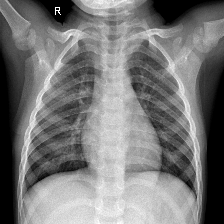

In [ ]:
load_img(img_normal, target_size=(224, 224), grayscale=True)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True
)

In [ ]:
train = train_datagen.flow_from_directory(
    directory = training_dir,
    target_size=(150, 150),
    color_mode="grayscale",
    class_mode="binary",
    batch_size=32 
)

Found 5216 images belonging to 2 classes.


In [ ]:
train.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
validation = validation_datagen.flow_from_directory(
    directory = validation_dir,
    target_size=(150, 150),
    color_mode="grayscale",
    class_mode="binary",
    batch_size=32 
)

test = test_datagen.flow_from_directory(
    directory = testing_dir,
    target_size=(150, 150),
    class_mode="binary",
    color_mode="grayscale",
    batch_size=32 
)

Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## CNN Architecture

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 38, 38, 64)       

## Training the Model

In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [ ]:
es = EarlyStopping(monitor='val_acc', patience=2, min_delta=0.01)

In [ ]:
model.fit_generator(
    generator=train,
    epochs=8,
    steps_per_epoch=len(train),
    validation_steps=len(validation),
    validation_data=validation,
    callbacks=[es]
)

Epoch 1/8
163/163 [==============================] - 69s 422ms/step - loss: 0.2769 - accuracy: 0.9074 - val_loss: 9.6734 - val_accuracy: 0.5000
Epoch 2/8
163/163 [==============================] - 68s 420ms/step - loss: 0.1805 - accuracy: 0.9321 - val_loss: 7.4157 - val_accuracy: 0.5000
Epoch 3/8
163/163 [==============================] - 67s 414ms/step - loss: 0.1717 - accuracy: 0.9342 - val_loss: 6.1071 - val_accuracy: 0.5000
Epoch 4/8
163/163 [==============================] - 67s 413ms/step - loss: 0.1291 - accuracy: 0.9532 - val_loss: 0.8503 - val_accuracy: 0.6875
Epoch 5/8
163/163 [==============================] - 68s 415ms/step - loss: 0.1138 - accuracy: 0.9586 - val_loss: 5.5561 - val_accuracy: 0.5000
Epoch 6/8
163/163 [==============================] - 68s 418ms/step - loss: 0.1162 - accuracy: 0.9607 - val_loss: 0.9836 - val_accuracy: 0.5625
Epoch 7/8
163/163 [==============================] - 68s 415ms/step - loss: 0.1182 - accuracy: 0.9565 - val_loss: 0.6277 - val_accuracy:

In [ ]:
model.save('./pneumonia_model.h5')

In [ ]:
model.evaluate_generator(test)[1]*100

92.30769276618958

## User Predictions

In [16]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/pneumonia_model.h5')

In [26]:
def user_predict(path, model):
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (150,150))
  img = img_to_array(img)
  img = img.reshape(1, 150, 150, 1)

  return(model.predict_classes(img)[0][0])

In [36]:
#path = '/content/drive/MyDrive/Datasets/chest_xray_pneumonia/test/PNEUMONIA/'+'person83_bacteria_411.jpeg'

path = '/content/drive/MyDrive/Datasets/chest_xray_pneumonia/test/NORMAL/'+'IM-0011-0001-0002.jpeg'

In [37]:
user_predict(path, model)

0